In [4]:

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [5]:

def class_sep(X,Y):
    pos=[]
    neg=[]
    for i in range(len(Y)):
        if Y[i]==+1:
            pos.append(X[i])
        else:
            neg.append(X[i])
    a=len(pos)/len(Y)
    return pos,neg,a

#we define the probability of normal distribution
def probab(x,u,sigma):
    det=np.linalg.det(sigma)
    inv_sigma=np.linalg.inv(sigma)
    d=np.exp(-0.5*np.matmul(np.matmul(np.transpose(x-u),inv_sigma),(x-u)))
    return d/(np.sqrt(det)*2.0*np.pi)

#risk is defined as eta(x); if eta(x)>0.5 classification: Y=+1
def risk(x,a,upos,uneg,sigpos,signeg):
    return (a*probab(x,upos,sigpos))/((a*probab(x,upos,sigpos))+((1-a)*probab(x,uneg,signeg)))


"""def R(X, a, mu0, mu1, invsgm0, invsgm1, det0, det1):
    X0=X-mu0
    X1=X-mu1
    cof0=-0.5*np.dot(np.dot(X0.transpose(), invsgm0), X0)
    c0=(1-a)/sqrt(det0)
    cof1=-0.5*np.dot(np.dot(X1.transpose(), invsgm1), X1)
    c1=a/sqrt(det1)
    risk=(c1*exp(cof1))/(c1*exp(cof1)+c0*exp(cof0))
    return risk
"""

def Bayes1a(X_train, Y_train, X_test):
    pos,neg,a=class_sep(X_train,Y_train)
    upos=np.mean(pos,axis=0)
    uneg=np.mean(neg,axis=0)
    sigma=np.identity(len(X_train[0]))
    predic=[];
    for i in range(len(X_test)):
        if risk(X_test[i],a,upos,uneg,sigma,sigma) > 0.5:
            predic.append(1)
        elif risk(X_test[i],a,upos,uneg,sigma,sigma) < 0.5:
            predic.append(-1)
        else:
            predic.append(np.random.choice([1, 0]))
            
    return np.array(predic)
    
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
    
def Bayes1b(X_train, Y_train, X_test):
    pos,neg,a=class_sep(X_train,Y_train)
    upos=np.mean(pos,axis=0)
    uneg=np.mean(neg,axis=0)
    sigma=np.cov(np.transpose(X_train))                 
    predic=[];
    for i in range(len(X_test)):
        if risk(X_test[i],a,upos,uneg,sigma,sigma) > 0.5:
            predic.append(1)
        elif risk(X_test[i],a,upos,uneg,sigma,sigma) < 0.5:
            predic.append(-1)
        else:
            predic.append(np.random.choice([1, 0]))
    
    return np.array(predic)
                     
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

def Bayes1c(X_train, Y_train, X_test):
    pos,neg,a=class_sep(X_train,Y_train)
    upos=np.mean(pos,axis=0)
    uneg=np.mean(neg,axis=0)
    sigmapos=np.cov(np.transpose(pos))
    sigmaneg=np.cov(np.transpose(neg))
    predic=[]
    for i in range(len(X_test)):
        if risk(X_test[i],a,upos,uneg,sigmapos,sigmaneg) > 0.5:
            predic.append(1)
        elif risk(X_test[i],a,upos,uneg,sigmapos,sigmaneg) < 0.5:
            predic.append(-1)
        else:
            predic.append(np.random.choice([1, 0]))
    
    return np.array(predic)
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """


In [6]:

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




[[0.98745509 1.13027466]
 [1.63101693 2.66506667]
 [0.77172771 2.34635875]
 ...
 [0.30783821 2.48975326]
 [0.94496987 0.16546025]
 [2.16225604 3.74470221]]
[[3.12386579 2.98390763]
 [2.20383074 3.0144612 ]
 [3.11065374 3.60335692]
 ...
 [3.46035225 4.25301481]
 [2.79702051 3.52364886]
 [2.02807425 4.05612738]]
[[0.98745509 1.13027466]
 [1.63101693 2.66506667]
 [0.77172771 2.34635875]
 ...
 [3.46035225 4.25301481]
 [2.79702051 3.52364886]
 [2.02807425 4.05612738]]


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


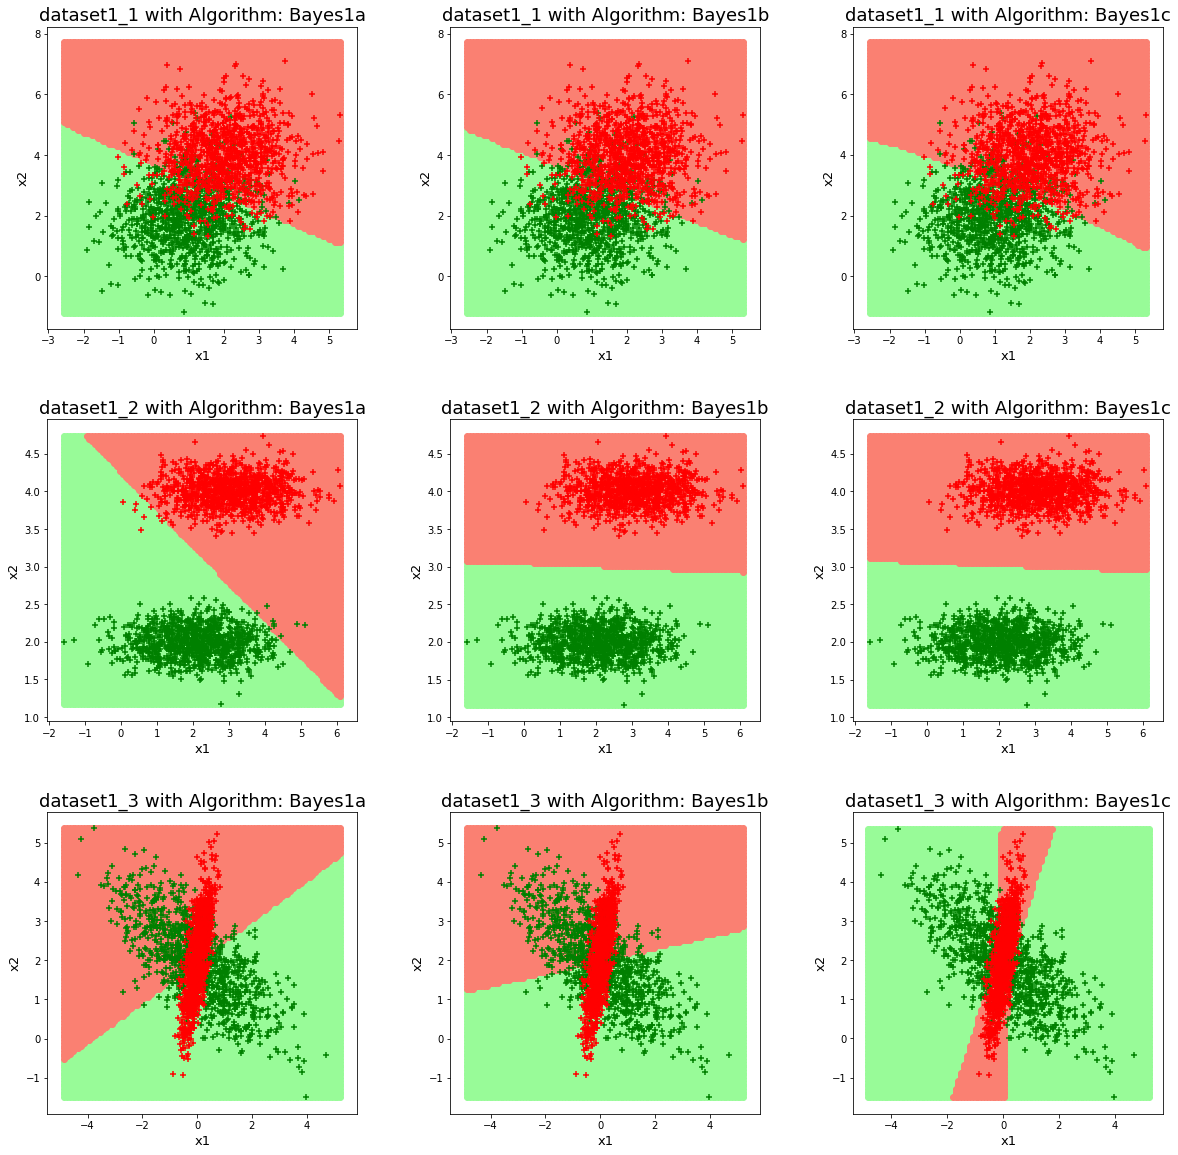

[[0.874, 0.8755, 0.8755], [0.9915, 1.0, 1.0], [0.503, 0.505, 0.865]]


In [9]:
dtfiles=['dataset1_1.npz','dataset1_2.npz','dataset1_3.npz']
dset={0:'dataset1_1',1:'dataset1_2',2:'dataset1_3'}
algo={0:'Bayes1a',1:'Bayes1b',2:'Bayes1c'}
i=0

# print("LEGEND")
# print("green: class=1")
# print("red: class=-1")
# print("marker: '.' : test data ")
# print("marker: '+' : training data ")
plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
accuracy=[]
for dtfile in dtfiles:
    acc_dtf=[]
    dataset=np.load(dtfile)
    X_train=dataset[dataset.files[0]]
    Y_train=dataset[dataset.files[1]]
    X_test=dataset[dataset.files[2]]
    Y_test=dataset[dataset.files[3]]
    # concatenate the training and testing data as both points are to be displayed in plot
    X=np.concatenate((X_train,X_test),axis=0)
    #X is a 2d vector (x1,x2)
    xmax=np.max(X,axis=0)
    xmin=np.min(X,axis=0)
    x1=np.linspace(xmin[0],xmax[0],100)
    x2=np.linspace(xmin[1],xmax[1],100)
    # use mesh for coloring the classified disjoint sets in R2
    xv,yv=np.meshgrid(x1,x2)
    x1=xv.reshape(10000,1)
    x2=yv.reshape(10000,1)
    Xmesh=np.stack((x1, x2), axis=-1)
    Xmesh=Xmesh.reshape(10000,2)
    
    Ymesh_pred=[Bayes1a(X_train, Y_train, Xmesh), Bayes1b(X_train, Y_train, Xmesh), Bayes1c(X_train, Y_train, Xmesh)]
    Y_pred =[Bayes1a(X_train, Y_train, X_test), Bayes1b(X_train, Y_train, X_test), Bayes1c(X_train, Y_train, X_test)]
    for j in range(3):
        
        #for calculating accuracy
        ac=0
        ltest=len(X_test)
        Y_predj=Y_pred[j]
        for z in range(ltest):
            if(Y_predj[z]==Y_test[z]):
                ac=ac+1
        acc_dtf.append(ac/ltest)  
            
        plt.subplot(str(331+i))
        plt.xlabel('x1',fontsize=13)
        plt.ylabel('x2',fontsize=13)
        plt.title("{} with Algorithm: {}".format(dset[int(i/3)],algo[int(i%3)]),fontsize=18)
        #color the region with light green and light red
        pos,neg,a = class_sep(Xmesh,Ymesh_pred[j])
        pos,neg=np.transpose(pos),np.transpose(neg)
        plt.scatter(pos[0],pos[1], color='palegreen')
        plt.scatter(neg[0],neg[1], color='salmon')
        #mark the classified test data
        pos,neg,a = class_sep(X_test,Y_pred[j])
        pos,neg=np.transpose(pos),np.transpose(neg)
        plt.scatter(pos[0],pos[1], marker='.', color='green')
        plt.scatter(neg[0],neg[1], marker='.', color='red')
        #mark the training data
        pos,neg,a = class_sep(X_train,Y_train)
        pos,neg=np.transpose(pos),np.transpose(neg)
        plt.scatter(pos[0],pos[1], marker="+", color='green')
        plt.scatter(neg[0],neg[1], marker="+", color='red')
        i=i+1

    accuracy.append(acc_dtf)
plt.show() 

print(accuracy)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Test Accuracy
Accuracy calculated from matrix: accuracy
            Bayes1a     Bayes1b     Bayes1c
dataset1_1  0.874       0.8755      0.8755
dataset1_2  0.9915      1.0         1.0
dataset1_3  0.503       0.505       0.865

## Error Rate (%) :

| Dataset         | Bayes1a | Bayes1b | Bayes1c |   
|---------|---------|---------|---------|
| **dataset1_1** | 12.60   | 12.45   | 12.45   |  
| **dataset1_2**  | 0.85    | 0.00    | 0.00    |   
| **dataset1_3**  | 49.70   | 49.50   | 13.50   |   


## Observations:
1. In algorithm Bayes1a, we have made a strong assumption that both the covariance matrices are equal and identity. In Bayes1b, we have assumed that the covariance matrices are equal and it is evaluated from training data. And in Bayes1c, we have evaluated both mean vectors and covariance vectors for both classes separately without any assumptions.
2. Therefore algorithm Bayes1c outperforms other algorithms for a given dataset. Bayes1b is slightly more accurate than Bayes1a.
3. The dataset1_2 is easily separable and hence algorithms Bayes1b and Bayes1c achieves 100% accuracy.
4. Bayes1c gives exceptionally better accuracy for dataset1_3, hence it is good to estimate covariance matrices of both the distributions. Separating data assuming equal covariances results in very high error. This dataset can't be separated by linear boundaries



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [29]:
# Cell type : CodeWrite
# Fill in functions in this cell

#L is a symmetric matrix
L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

def class_sep(X,Y):
    cl1=[]
    cl2=[]
    cl3=[]
    cl4=[]
    a=[]
    cl=[]
    for i in range(len(Y)):
        if Y[i]==1:
            cl1.append(X[i])
        elif Y[i]==2:
            cl2.append(X[i])
        elif Y[i]==3:
            cl3.append(X[i])
        else:
            cl4.append(X[i])
    cl.append(cl1)
    cl.append(cl2)
    cl.append(cl3)
    cl.append(cl4)
    for i in range(4):
        a.append(len(cl[i])/len(Y))
    return cl,a

def probab(x,u,sigma):
    det=np.linalg.det(sigma)
    inv_sigma=np.linalg.inv(sigma)
    d=np.exp(-0.5*np.matmul(np.matmul(np.transpose(x-u),inv_sigma),(x-u)))
    return d/(np.sqrt(det)*2.0*np.pi)

#we are only concerned with the numerator of etai(x)
def risk(x,a,u,sigma):
    eta=[]
    for i in range(4):
        eta.append(a[i]*probab(x,u[i],sigma[i]))
    risk=np.matmul(np.transpose(eta),L)
    return np.array(risk)


def Bayes2a(X_train, Y_train, X_test):
    u=[]
    sigma=[]
    cl,a = class_sep(X_train, Y_train)
    predic=[]
    for i in range(4):
        u.append(np.mean(cl[i],axis=0))
        sigma.append(np.identity(len(X_train[0])))
    
    for i in range(len(X_test)):
        predic.append(1+np.argmin(risk(X_test[i],a,u,sigma)))
    
    return np.array(predic)
        
    
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
def Bayes2b(X_train, Y_train, X_test):
    u=[]
    sigma=[]
    cl,a = class_sep(X_train, Y_train)
    predic=[]
    for i in range(4):
        u.append(np.mean(cl[i],axis=0))
        sigma.append(np.cov(np.transpose(X_train)))
        
    for i in range(len(X_test)):
        predic.append(1+np.argmin(risk(X_test[i],a,u,sigma)))
    
    return np.array(predic)
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

def Bayes2c(X_train, Y_train, X_test):
    u=[]
    sigma=[]
    cl,a = class_sep(X_train, Y_train)
    predic=[]
    for i in range(4):
        u.append(np.mean(cl[i],axis=0))
        sigma.append(np.cov(np.transpose(cl[i])))
        
    for i in range(len(X_test)):
        predic.append(1+np.argmin(risk(X_test[i],a,u,sigma)))
    
    return np.array(predic)
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """


    


    


In [30]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


LEGEND
green=class:1, red=class:2, grey=class:3, blue=class:4
marker '.' : test data;  marker '+' : train data marker by lighter shades


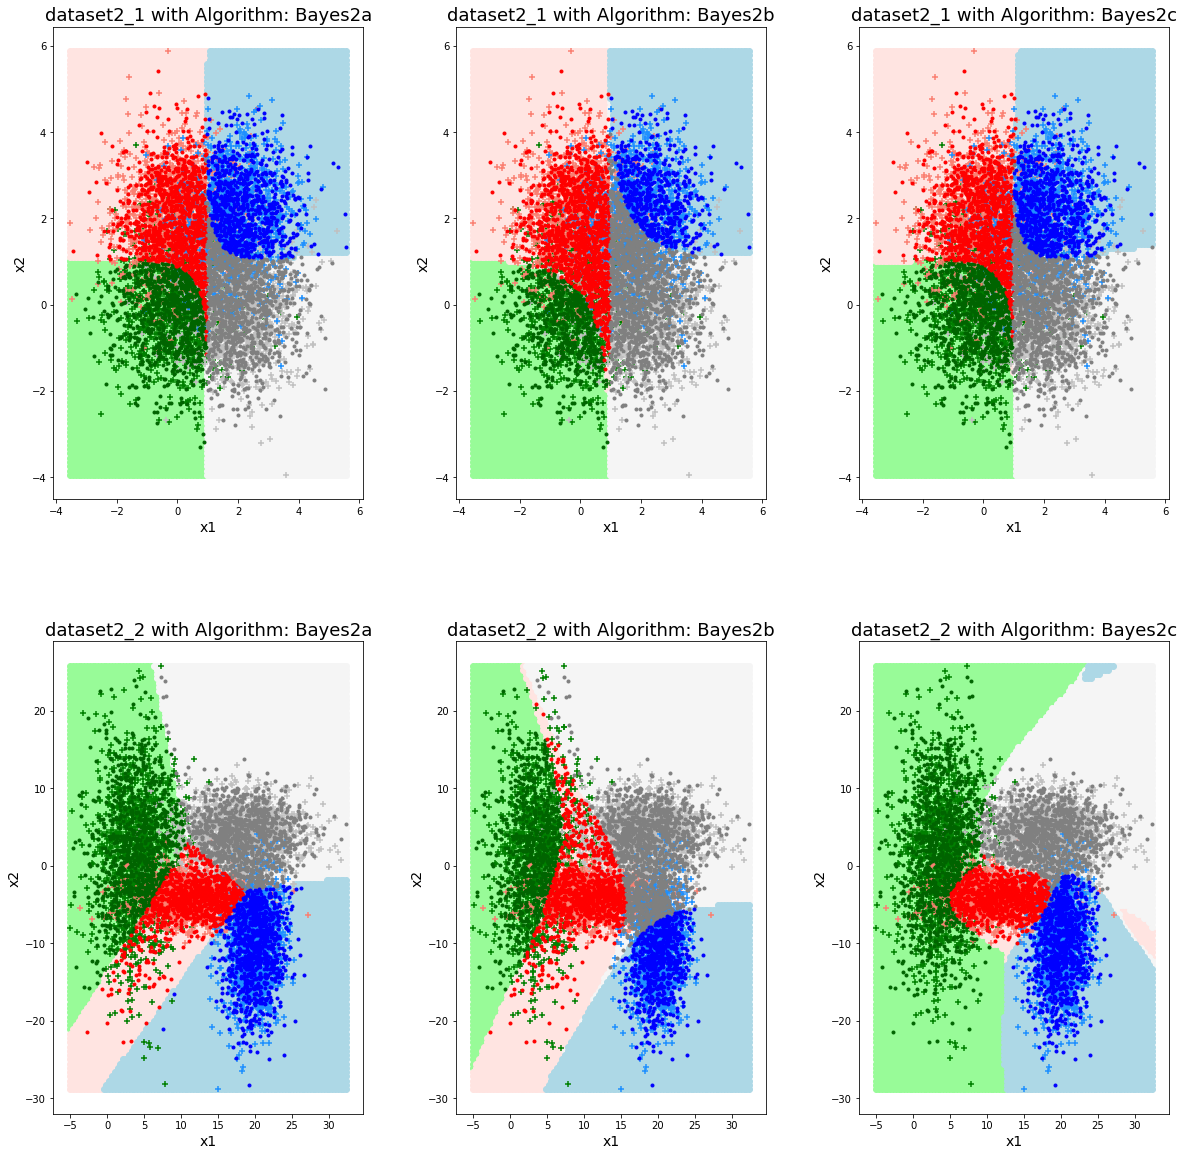

In [47]:
def confusion_matrix(Y_t,Y_p):
    conf=np.zeros((4,4))
    for i in range(len(Y_t)):
        a=int(Y_t[i])
        b=int(Y_p[i])
        conf[a-1][b-1]=conf[a-1][b-1]+1
    return conf

    
dtfiles=['dataset2_1.npz','dataset2_2.npz']
dset={0:'dataset2_1',1:'dataset2_2'}
algo={0:'Bayes2a',1:'Bayes2b',2:'Bayes2c'}
i=0

# print("LEGEND")
# print("green=class:1, red=class:2, grey=class:3, blue=class:4")
# print("marker '.' : test data;  marker '+' : train data marker by lighter shades")

conf_mat=[]
plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for dtfile in dtfiles:
    conf_mat_dtf=[]
    dataset=np.load(dtfile)
    X_train=dataset[dataset.files[0]]
    Y_train=dataset[dataset.files[1]]
    X_test=dataset[dataset.files[2]]
    Y_test=dataset[dataset.files[3]]
    X=np.concatenate((X_train,X_test), axis=0)
    xmax=np.max(X,axis=0)
    xmin=np.min(X,axis=0)
    x1=np.linspace(xmin[0],xmax[0],100)
    x2=np.linspace(xmin[1],xmax[1],100)
    xv,yv=np.meshgrid(x1,x2)
    x1=xv.reshape(10000,1)
    x2=yv.reshape(10000,1)
    Xmesh=np.stack((x1,x2), axis=-1)
    Xmesh=Xmesh.reshape(10000,2)
    Ymesh_pred=[Bayes2a(X_train,Y_train,Xmesh),Bayes2b(X_train,Y_train,Xmesh),Bayes2c(X_train,Y_train,Xmesh)]
    Y_pred=[Bayes2a(X_train,Y_train,X_test),Bayes2b(X_train,Y_train,X_test),Bayes2c(X_train,Y_train,X_test)]
    for j in range(3):
        conf_mat_dtf.append(confusion_matrix(Y_test,Y_pred[j]))
        plt.subplot(str(231+i))
        plt.xlabel('x1',fontsize=14)
        plt.ylabel('x2',fontsize=14)
        plt.title("{} with Algorithm: {}".format(dset[int(i/3)],algo[int(i%3)]),fontsize=18)
        #plt.legend(['green:1, red:2, grey:3, blue:4'])
        #color the classified regions
        cl,a=class_sep(Xmesh,Ymesh_pred[j])
        cl0=np.transpose(cl[0])
        cl1=np.transpose(cl[1])
        cl2=np.transpose(cl[2])
        cl3=np.transpose(cl[3])
        plt.scatter(cl0[0], cl0[1], color='palegreen')
        plt.scatter(cl1[0], cl1[1], color='mistyrose')
        plt.scatter(cl2[0], cl2[1], color='whitesmoke')
        plt.scatter(cl3[0], cl3[1], color='lightblue')
        
        #mark the training data
        cl,a=class_sep(X_train,Y_train)
        cl0=np.transpose(cl[0])
        cl1=np.transpose(cl[1])
        cl2=np.transpose(cl[2])
        cl3=np.transpose(cl[3])
        plt.scatter(cl0[0], cl0[1], marker="+", color='green')
        plt.scatter(cl1[0], cl1[1], marker="+", color='salmon')
        plt.scatter(cl2[0], cl2[1], marker="+", color='silver')
        plt.scatter(cl3[0], cl3[1], marker="+", color='dodgerblue')
        
        #classify the points from testing data
        cl,a=class_sep(X_test,Y_pred[j])
        cl0=np.transpose(cl[0])
        cl1=np.transpose(cl[1])
        cl2=np.transpose(cl[2])
        cl3=np.transpose(cl[3])
        plt.scatter(cl0[0], cl0[1], marker='.', color='darkgreen')
        plt.scatter(cl1[0], cl1[1], marker='.', color='red')
        plt.scatter(cl2[0], cl2[1], marker='.', color='grey')
        plt.scatter(cl3[0], cl3[1], marker='.', color='blue')
        i=i+1
    conf_mat.append(conf_mat_dtf)
plt.show()

# for i in range(2):
#     for j in range(3):
#         print("conf mat for dataset:", i+1, "algorithm", j+1 )
#         print(conf_mat[i][j])
#         er=conf_mat[i][j]*L
#         exper=np.sum(er)
#         print("the expected error is:", exper)

#*LEGEND*
# green=class:1, red=class:2, grey=class:3, blue=class:4
# marker '.' : test data;  marker '+' : train data marker by lighter shades

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

## Observations:
**In Bayes1a we make the string assumption that the covariance matrices are equal and equal to Identity. In Bayes2b we let the covariance matrix equal but estimate it from the training data. And in Bayes2c we estimate the covariance matrices for different classes from the dataset without any assummption.
Bayes 2c gives better result and least loss when compared to other algorithm for a given dataset. Here it is observed that Bayes2a gives lesser loss than Bayes2b.**



## Expected Loss (using the loss matrix given):

|Datasets| Bayes2a| Bayes2b|Bayes2c|
|-----|----|----|---|
|**dataset2_1**| 1719| 1830|1712|
|**dataset2_2**| 734|1041|562|





## Confusion Matrices:

dataset2_1 with Bayes2a
[[633 219 136  12]
 [ 97 738  62 103]
 [ 86  49 770  95]
 [ 15 136 194 655]]

dataset2_1 with Bayes2b
[[463 388 145   4]
 [ 43 791 113  53]
 [ 40  95 818  47]
 [  4 149 346 501]]

dataset2_1 with Bayes2c
[[633 218 138  11]
 [ 99 742  61  98]
 [ 87  47 772  94]
 [ 15 134 201 650]]


dataset2_2 with Bayes2a
[[830 150  18   2]
 [ 93 784  46  77]
 [ 30  61 905   4]
 [  0  23  78 899]]

dataset2_2 with Bayes2b
[[675 302  23   0]
 [ 39 749 205   7]
 [  7 118 875   0]
 [  0   3 297 700]]

dataset2_2 with Bayes2c
[[901  80  19   0]
 [ 64 824  47  65]
 [ 19  31 936  14]
 [  0  36  48 916]]

*intentionally not printed in tabular form*


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




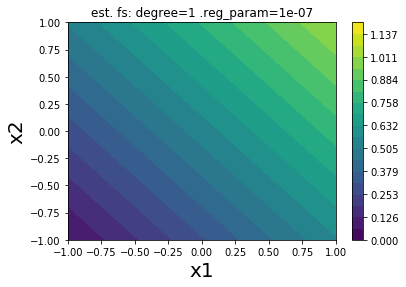

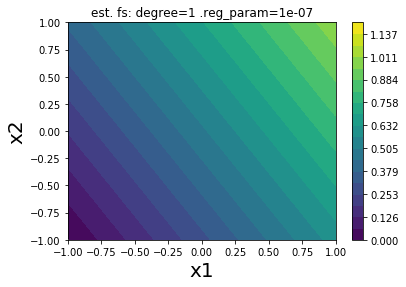

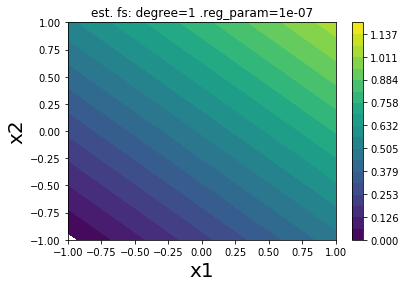

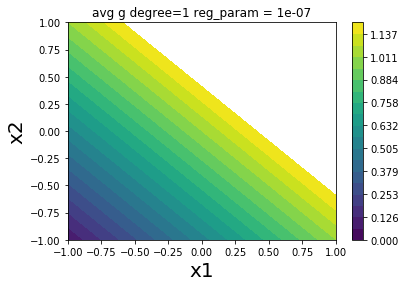

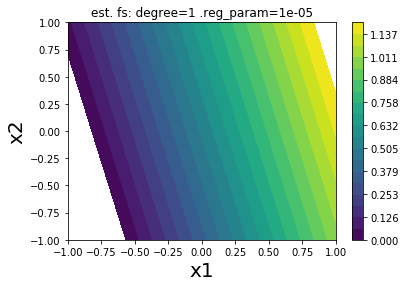

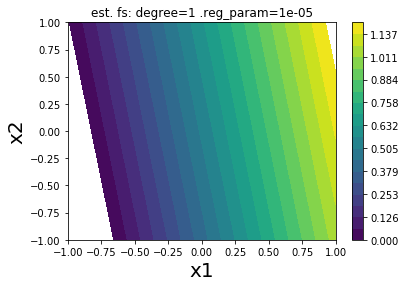

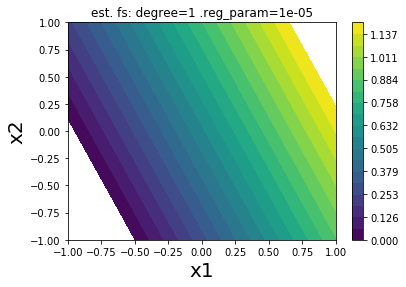

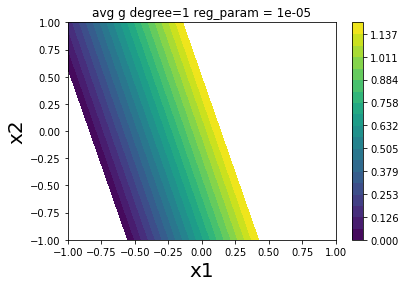

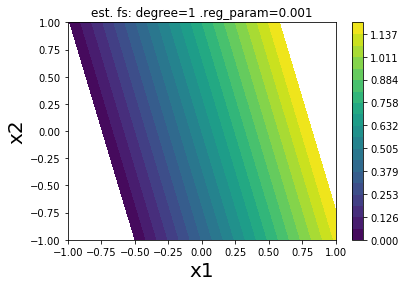

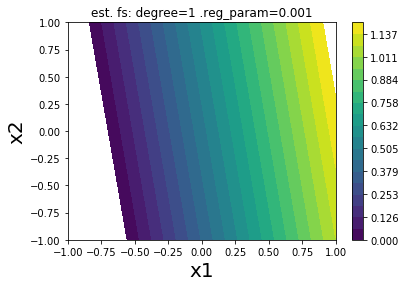

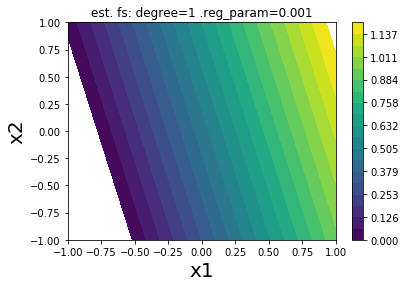

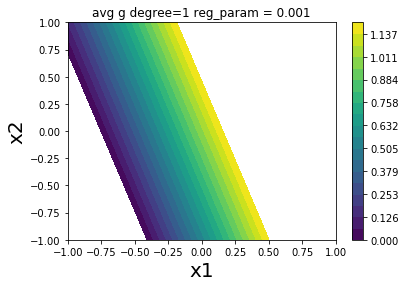

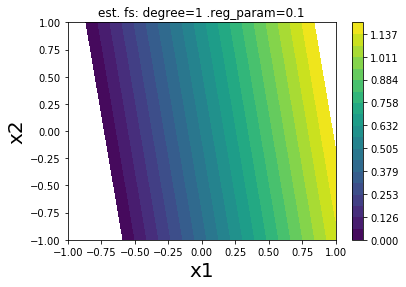

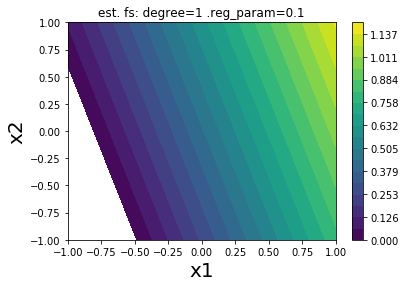

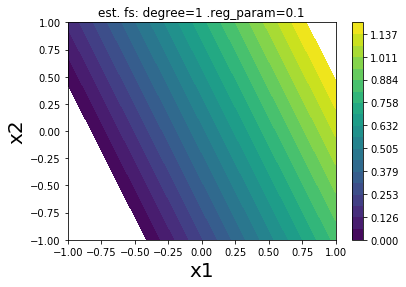

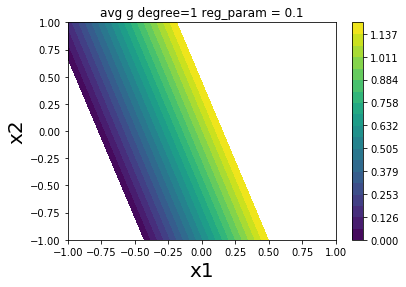

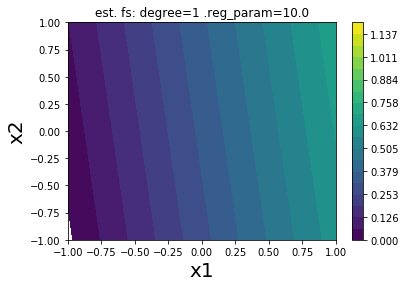

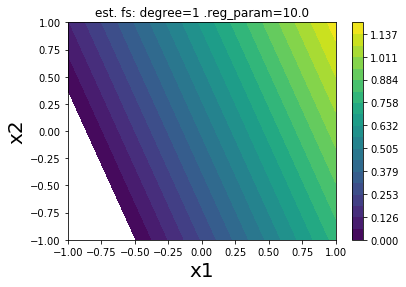

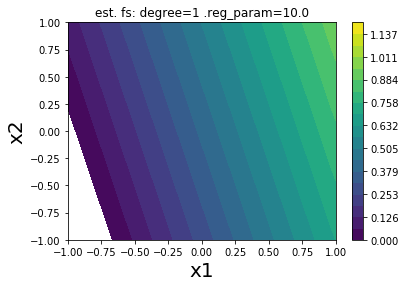

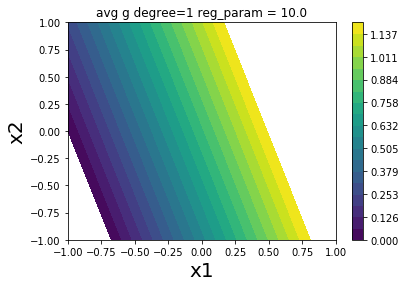

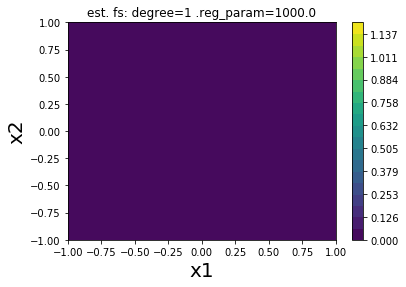

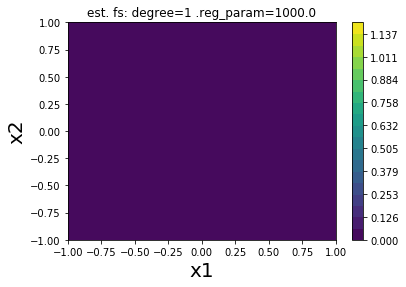

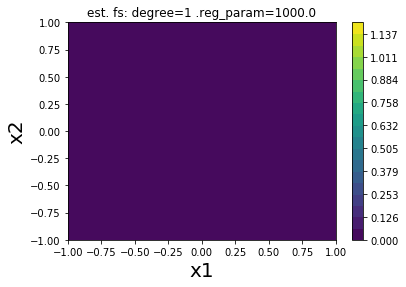

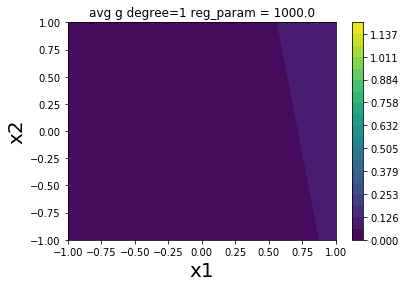

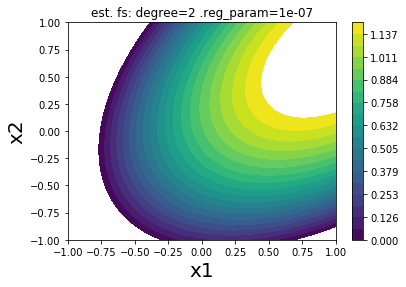

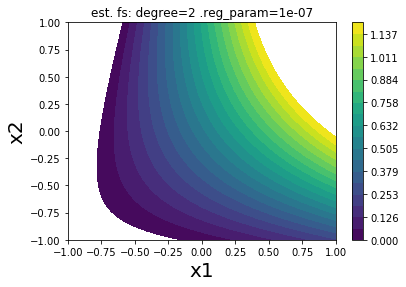

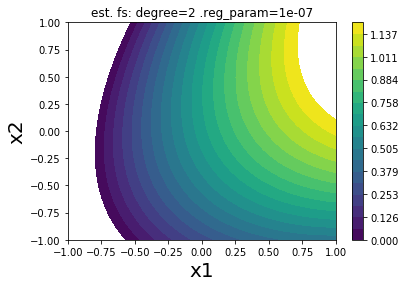

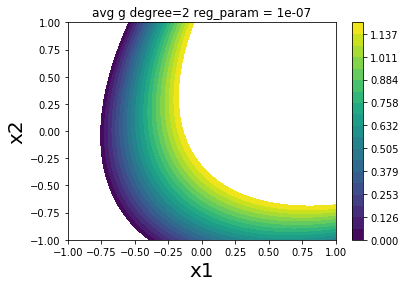

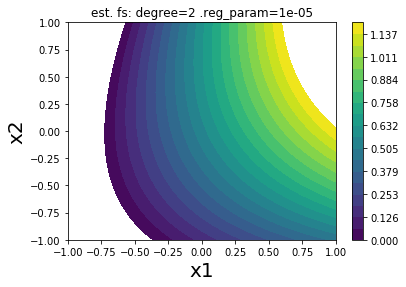

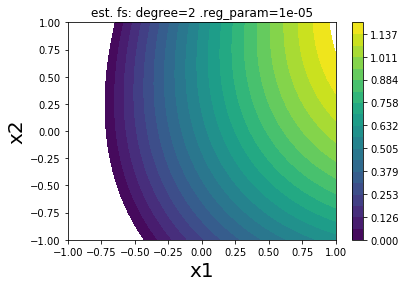

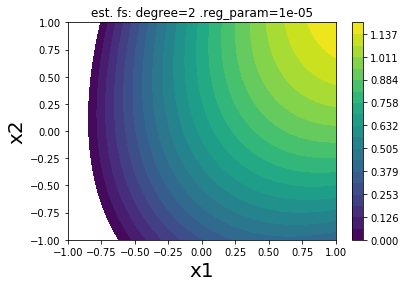

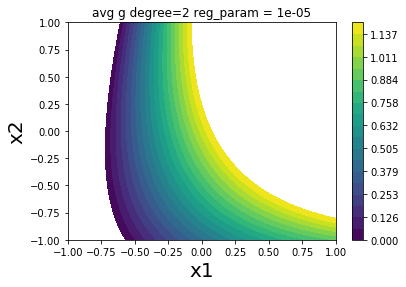

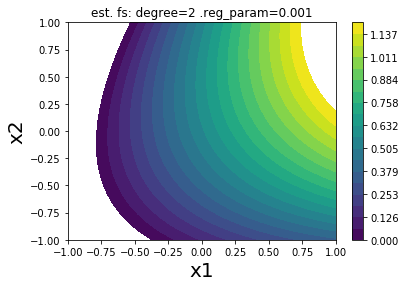

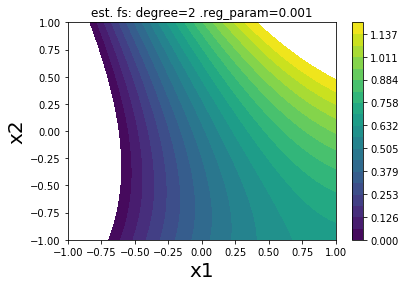

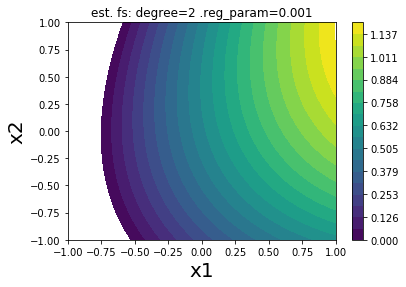

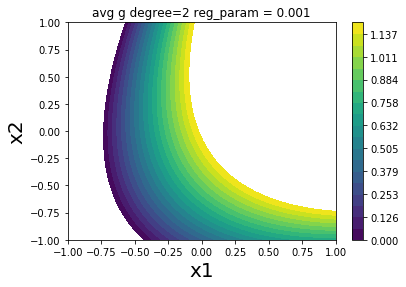

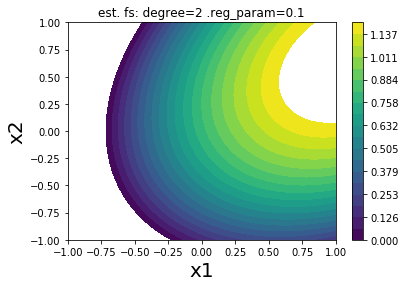

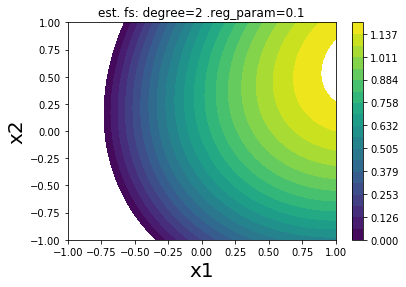

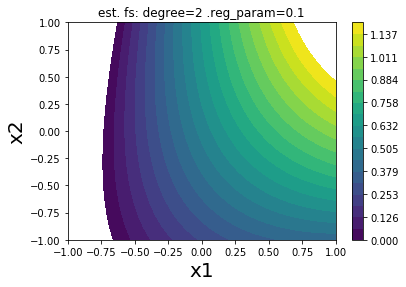

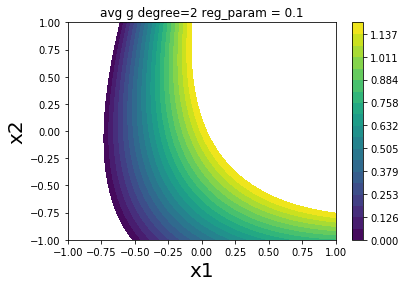

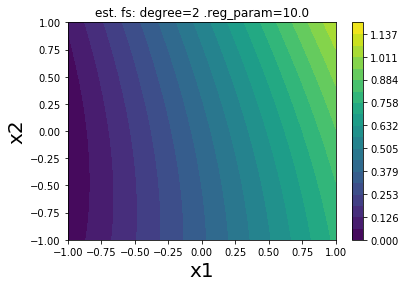

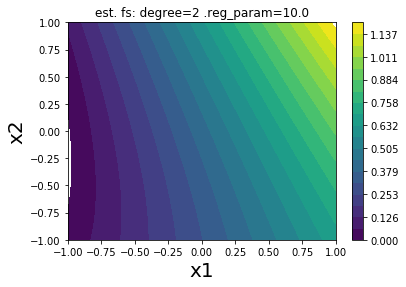

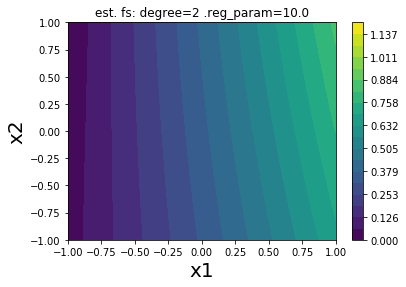

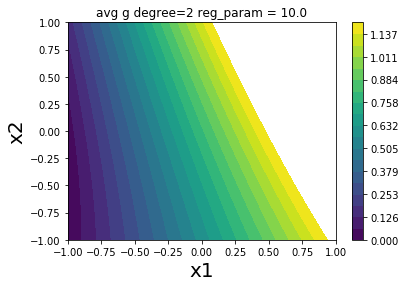

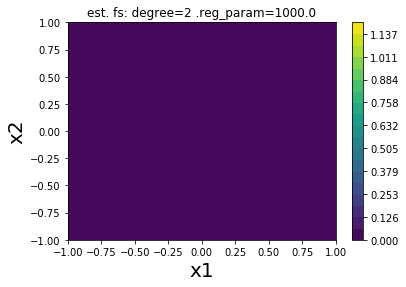

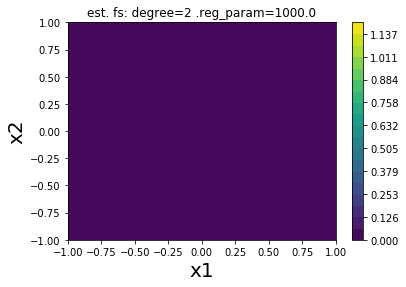

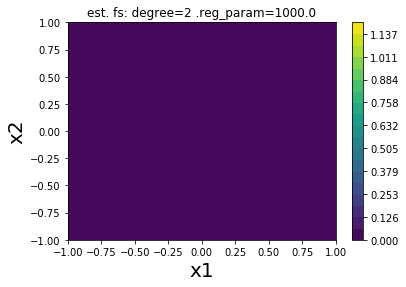

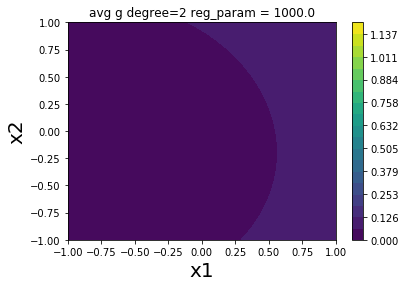

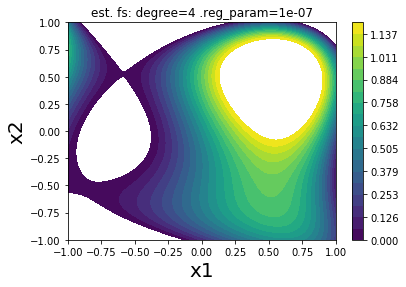

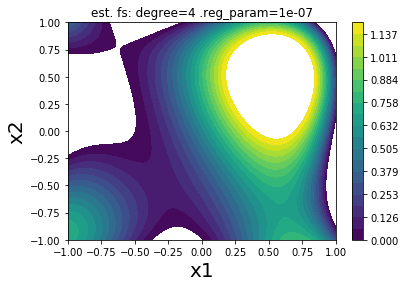

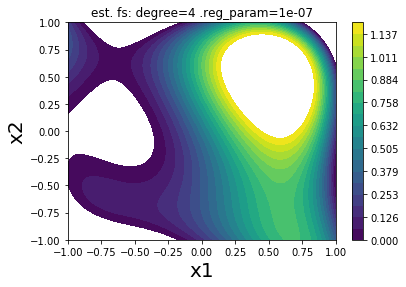

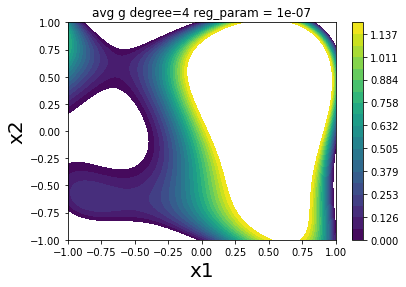

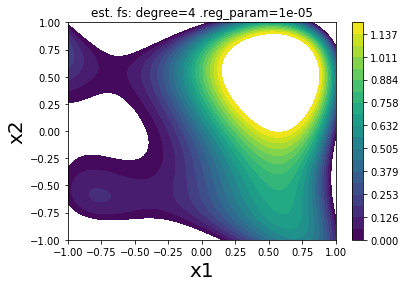

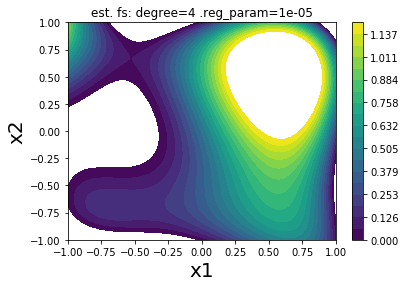

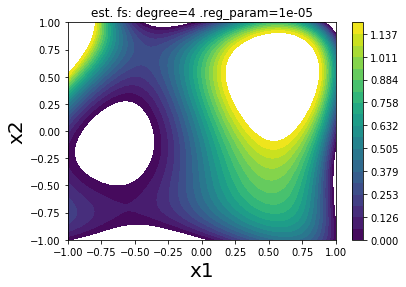

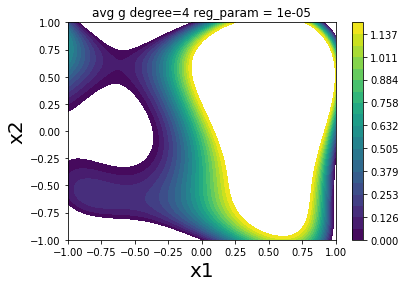

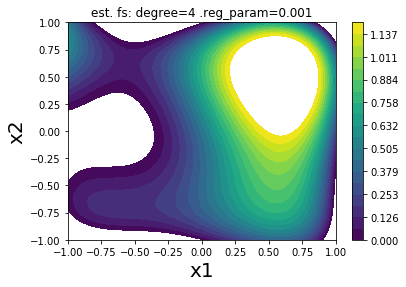

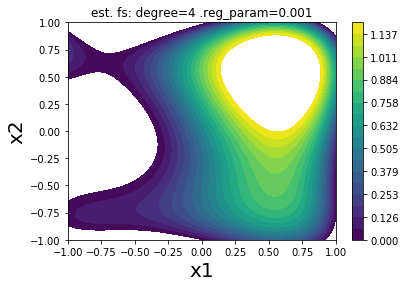

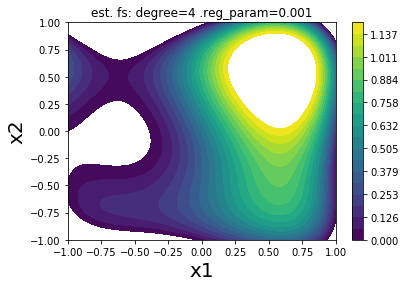

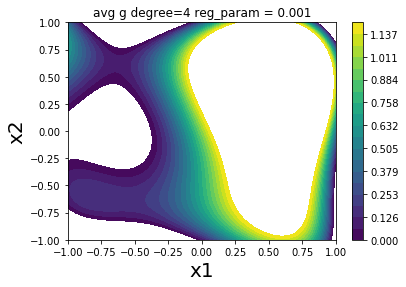

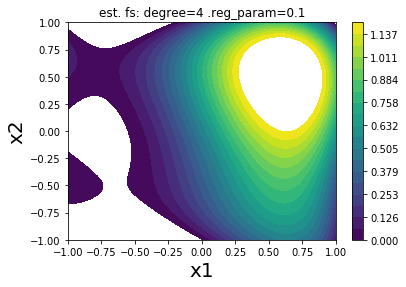

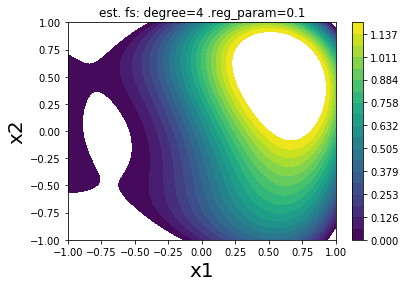

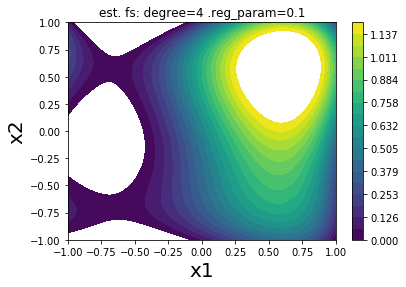

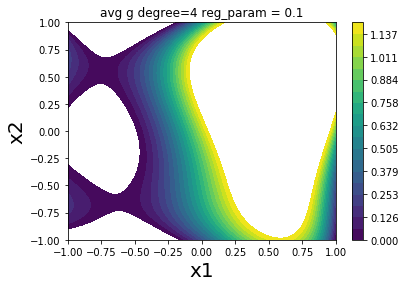

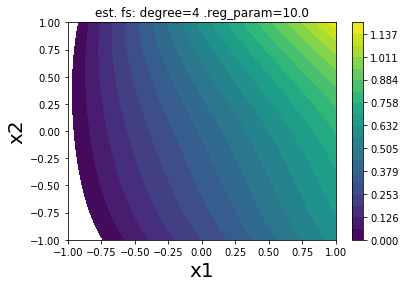

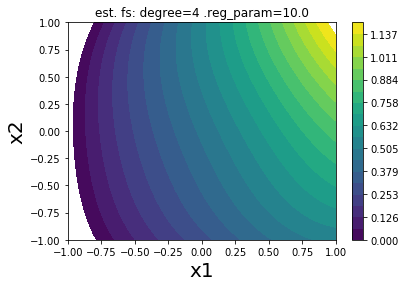

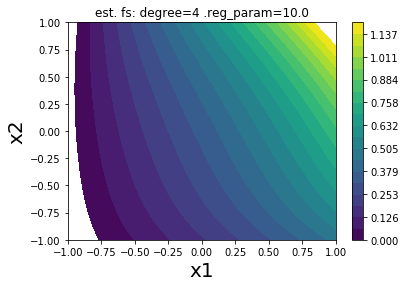

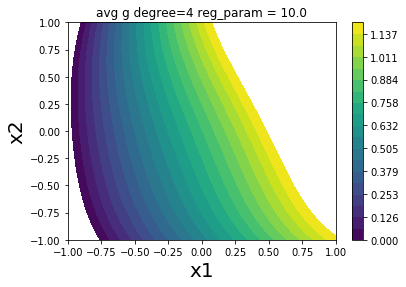

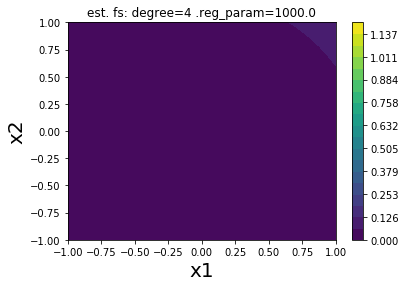

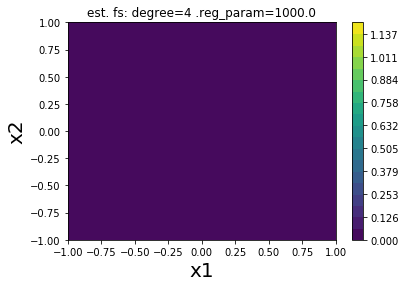

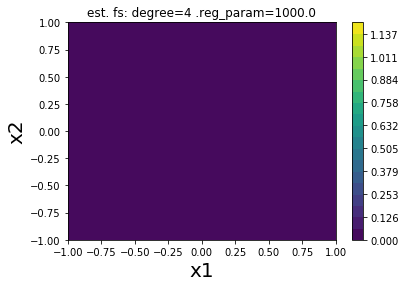

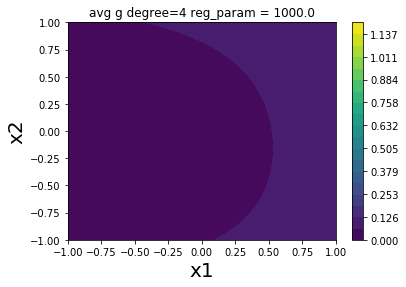

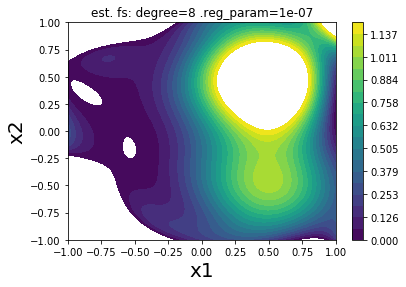

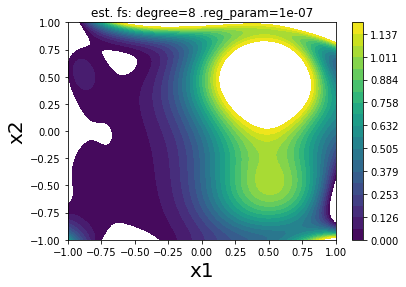

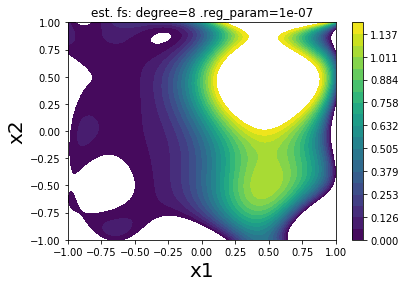

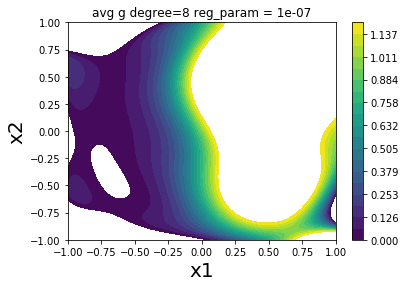

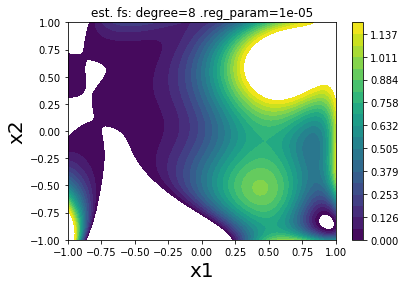

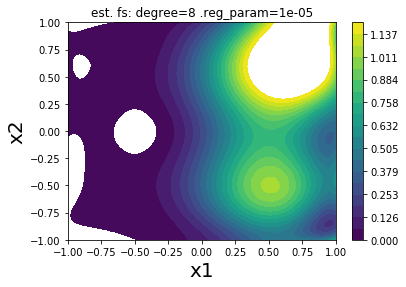

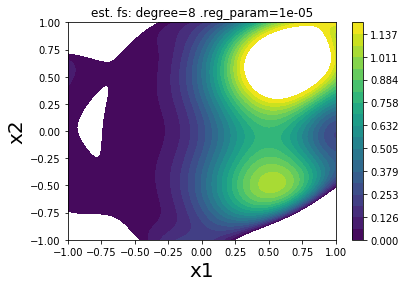

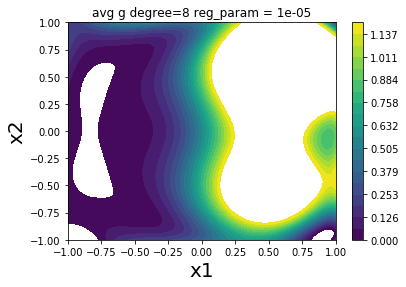

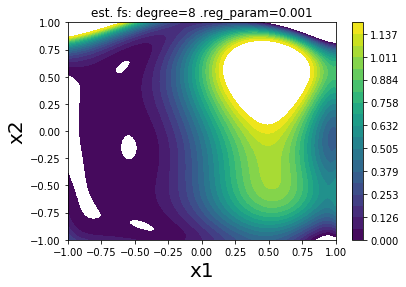

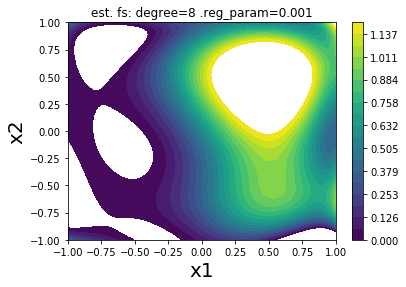

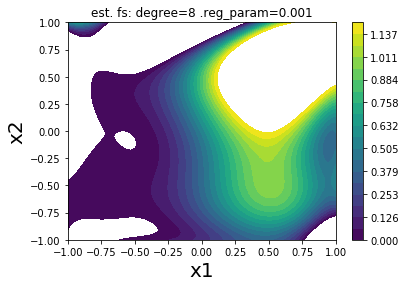

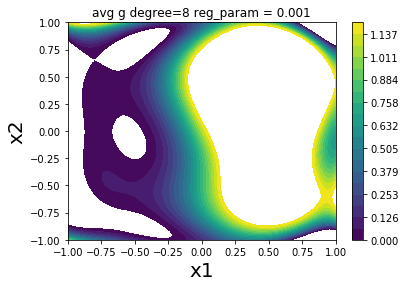

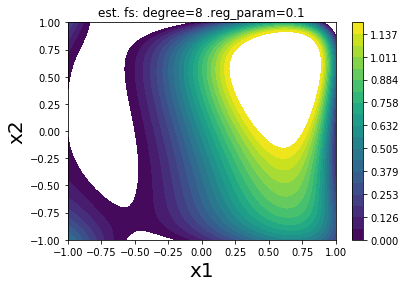

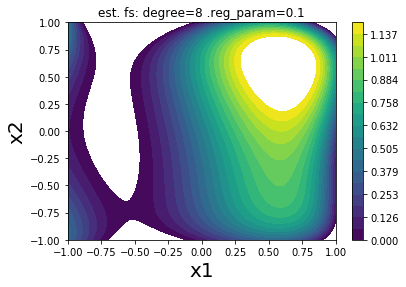

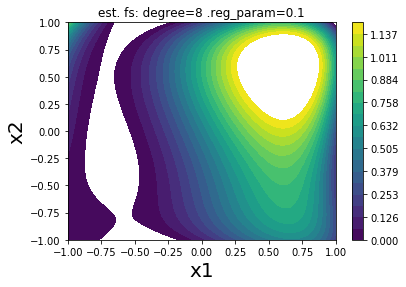

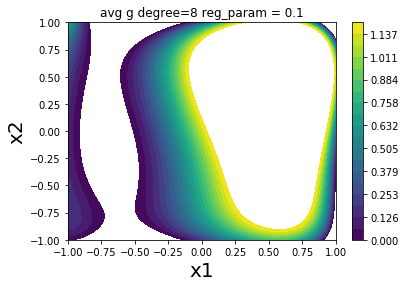

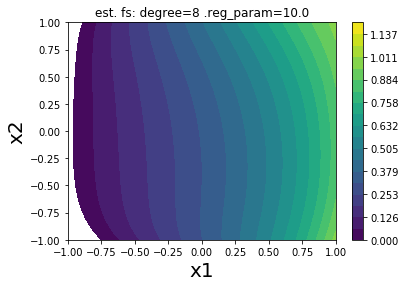

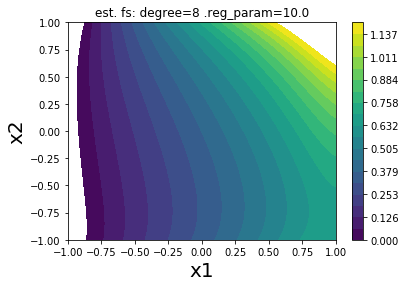

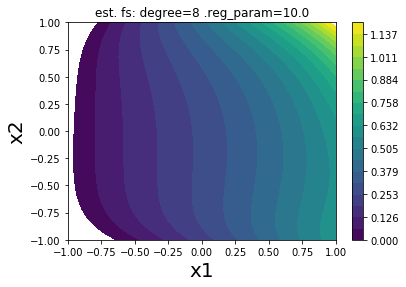

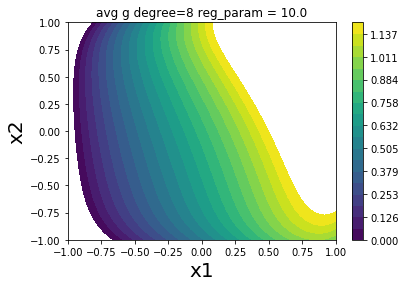

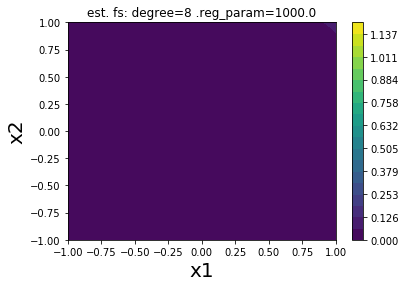

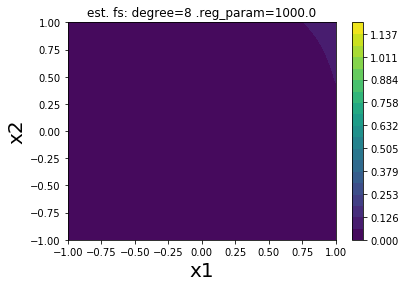

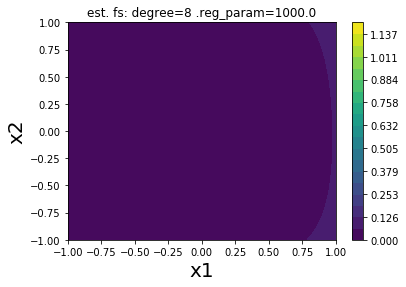

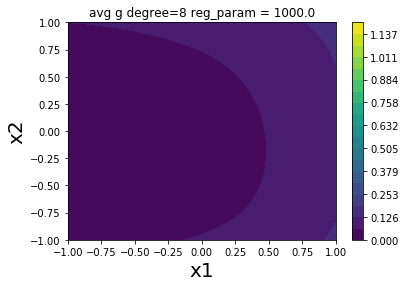

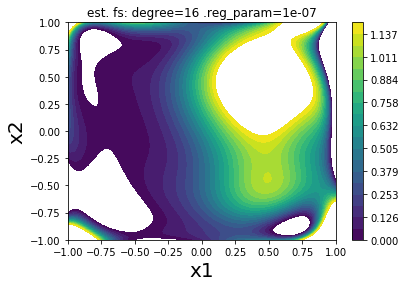

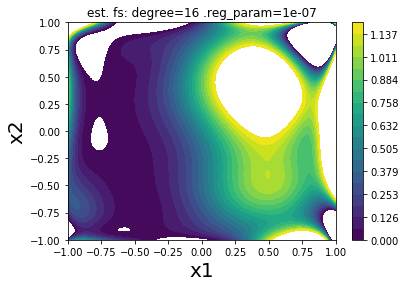

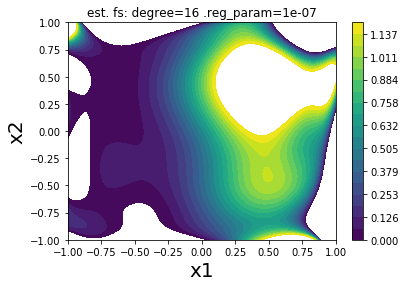

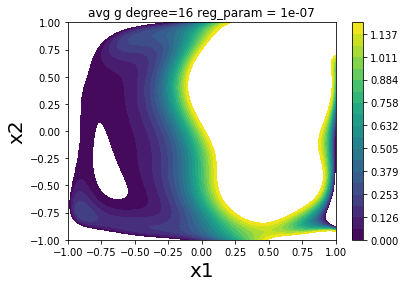

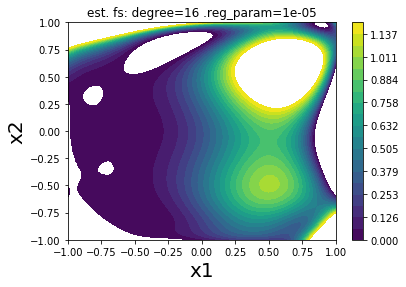

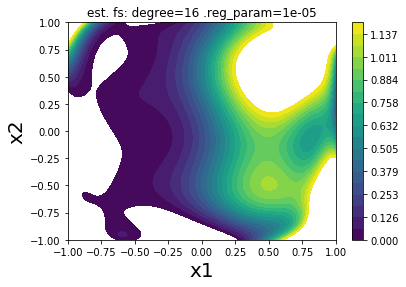

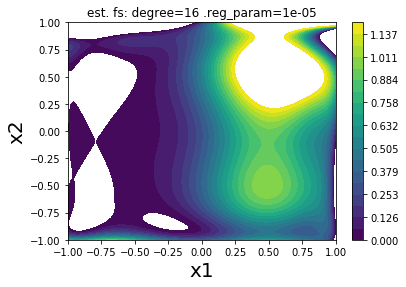

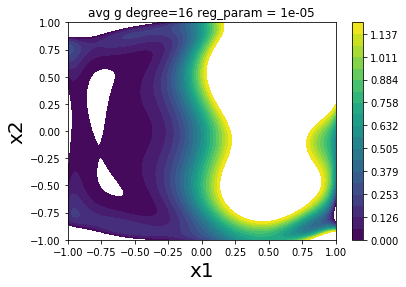

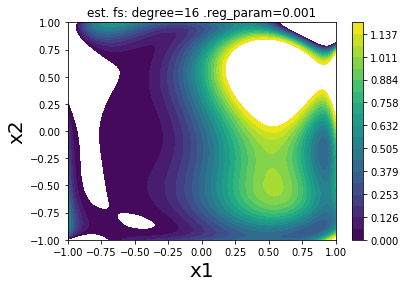

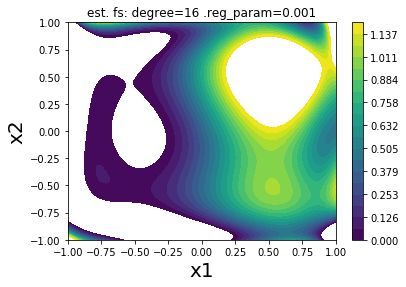

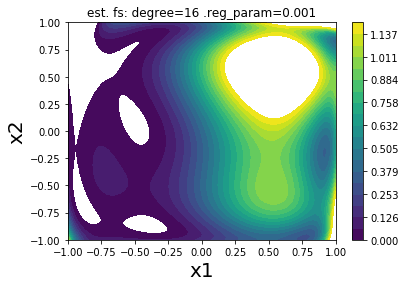

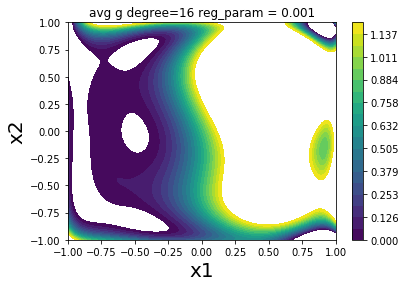

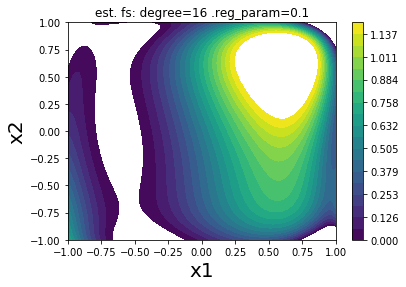

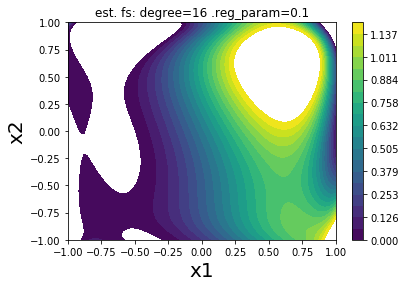

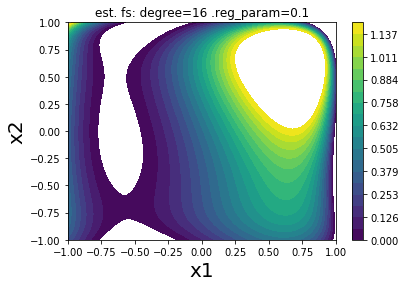

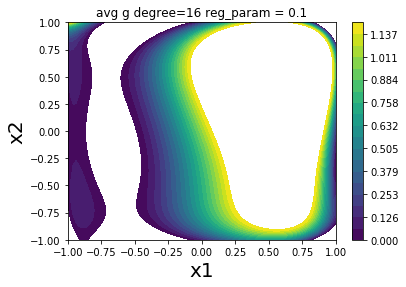

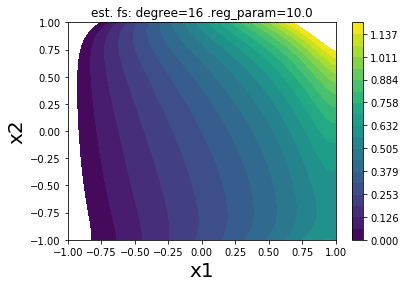

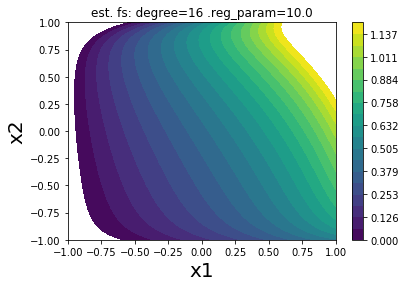

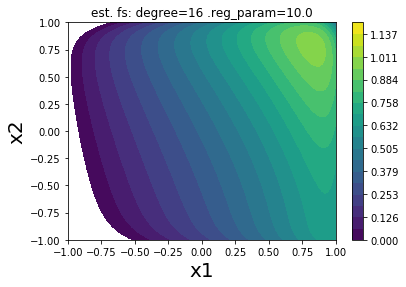

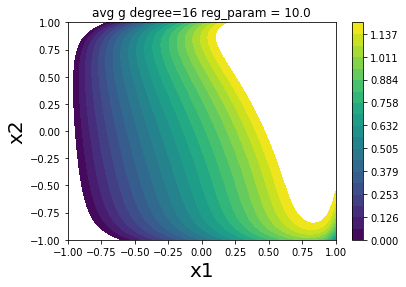

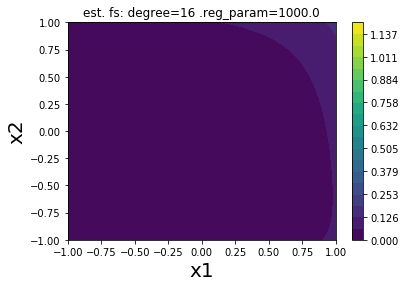

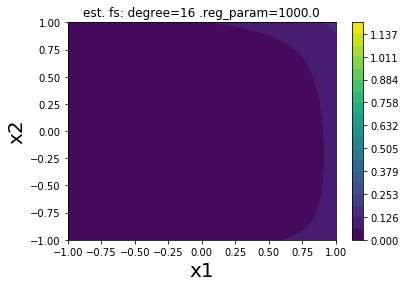

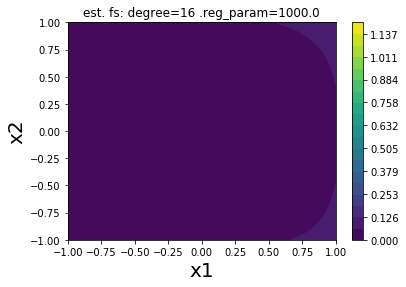

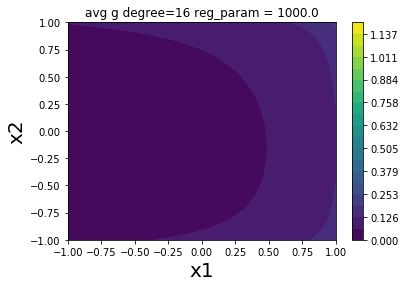

In [9]:

import numpy as np
import matplotlib.pyplot as plt
degrees=[1,2,4,8,16]
lambs=[1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]

def phi(x,k):
    d=2
    phi=[]
    for i in range(k+1):
        for j in range (i+1):
            phi.append((x[0]**j)*(x[1]**(i-j)))
    return np.array(phi)

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    d=2
    Y_test_pred=[]
    for x in X_test:
        Y_test_pred.append(np.matmul(np.transpose(wt_vector),phi(x,degree)))
    return np.array(Y_test_pred)
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
        
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    x1=X.reshape(10000,1)
    x2=Y.reshape(10000,1)
    X_=np.stack((x1,x2), axis=-1)
    X_=X_.reshape(10000,2)
    Z=polynomial_regression_ridge_pred(X_,wt_vector,degree)
    Z = np.reshape(Z,(-1,100))
    # Get Z using other functions
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2,20))
    plt.title(title)
    plt.xlabel('x1', fontsize=20)
    plt.ylabel('x2', fontsize=20)
    plt.colorbar()
    plt.show()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n=len(X_train)
    Phi=[]
    l=reg_param
    for x in X_train:
        Phi.append(phi(x,degree))
    K=np.matmul(Phi,np.transpose(Phi))
    # dimension of phi_matrix is nxf, f is no of features, dim(K)=nxn
    B= np.linalg.inv(K+l*(np.identity(n)))
    alpha = np.matmul(B,Y_train)
    #dimension of alpha is px1
    P=[] 
    w=np.matmul(np.transpose(Phi),alpha)
    return np.array(w)


a = np.array([0.5,0.5])
b = np.array([-0.5,0.5])
c = np.array([0.5,-0.5])

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    d = int(0.5*((degree+2)*(degree+1)))
    g = np.zeros(d)
    w_mat=[]
    for i in range(100):
        var=[]
        X_train=np.random.uniform(-1,1,(num_training_samples,2))
        Y_train=[]
        for x in X_train:
            Y_train.append( np.exp(-4*((np.linalg.norm(x-a))**2)) + np.exp(-4*((np.linalg.norm(x-b))**2)) + np.exp(-4*((np.linalg.norm(x-c))**2))) 
        Y_train=np.array(Y_train)

        w=polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param)
        w_mat.append(w)
        g=g+np.transpose(w)
    #print some 3 contour plots here
    #print("i m here at 1")
    for j in range(3):
        visualise_polynomial_2d(w_mat[j],degree,"est. fs: degree=" +str(degree)+ " .reg_param=" + str(reg_param))
    #print("i m here at 2")
    g = g/num_training_samples
    g = np.transpose(g)
    visualise_polynomial_2d(g,degree,"avg g degree=" +str(degree)+ " reg_param = " + str(reg_param))
    #print("i m here at 3")
    X_test = np.random.uniform(-1,1,(1000,2))
    Y_test=[]
    for x in X_test:
        Y_test.append( np.exp(-4*((np.linalg.norm(x-a))**2)) + np.exp(-4*((np.linalg.norm(x-b))**2)) + np.exp(-4*((np.linalg.norm(x-c))**2))) 
    Y_test=np.array(Y_test)
    
    bias=0
    for x in X_test:
        y=np.exp(-4*((np.linalg.norm(x-a))**2)) + np.exp(-4*((np.linalg.norm(x-b))**2)) + np.exp(-4*((np.linalg.norm(x-c))**2))
        bias=bias+(((np.matmul(np.transpose(g),np.transpose(phi(x,degree))))) - y)**2
    bias = bias/1000
    
    var=0
    for i in range(100):
        v=0
        for x in X_test:
            v=v+(np.matmul(np.transpose(w_mat[i]-g),np.transpose(phi(x,degree))))**2
        v=v/1000
        var=var+v
    var=var/100
    mse=bias+var
    return bias, var, mse
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)


In [6]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

## Bias
| **degree** | 𝜆=1e-7 | 𝜆=1e-5  | 𝜆=1e-3 | 𝜆=1e-1  | 𝜆=1e1 | 𝜆=1e3 |
|------|------|------|------|------|------|------|
|**1**|0.34663660869172486|0.5101285426856096|0.42547872067489456|0.43381613446440204|0.2044959649374929|0.43376779833136525|
|   **2**  |0.5968980666123146|0.5257761287800338|0.5735500980887306|0.533466432138839|0.2097809487741812|0.4371492056062675|
|   **4**  |0.5700958109313946|0.5136573561423193|0.5017511541346288|0.4867290226707387|0.27686696847256986|0.4840241379223341|
|   **8**  |0.7526738934332022|0.42117050929042366|0.5376043563795777|0.48952845615332113|0.24499089589738127|0.43112238798292807|
|   **16**  |0.8482059569125878|0.4265666451849829|0.5416271275408086|0.5068034506411045|0.24362779364577028|0.4451686223023449|

---------------------------

## Variance
| **degree** | 𝜆=1e-7 | 𝜆=1e-5  | 𝜆=1e-3 | 𝜆=1e-1  | 𝜆=1e1 | 𝜆=1e3 |
|------|------|------|------|------|------|------|
|**1**|0.2906511356202587|0.39695602956994136|0.42547872067489456|0.43381613446440204|0.22407679792584045|0.0007117163604520633|
|   **2**  |0.48010129291749615|0.4563129671081417|0.47135523791203027|0.43938789168574|0.23535064153672347|0.0008748663371388094|
|   **4**  |0.5692968132455121|0.5080700728016495|0.49625234053294115|0.48291780372681203|0.2573286596892068|0.0010144409017820346|
|   **8**  |1.025220345552686|0.47911320922128825|0.5671177496256673|0.490998373798787|0.2541617918871707|0.0011251411883360784|
|   **16** |1.1920242311911244|0.49160592471330433|0.6028618512215881|0.514694504960298|0.27299531393280896|0.0011063849054911295| 



## Summary
**Regularization is a method to avoid overfitting by reducing the model complexity. As the degree increases there is overfitting (variance increases), however the high value of ridge regression parameter (𝜆) keeps the coefficient small and reduces overfitting. Thus by varying both we can find an optimal value of degree and ridge regression coefficient.
Higher value of 𝜆 makes the model stiff , whereas a smaller value keeps the model flexible.
As the regularisation parameter (𝜆) increases the bias increases
Though not monotonous, but the bias-variance tradeoff can be observed**



** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Best Learned Functions:


/Users/rudransh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: The following kwargs were not used by contour: 'color'


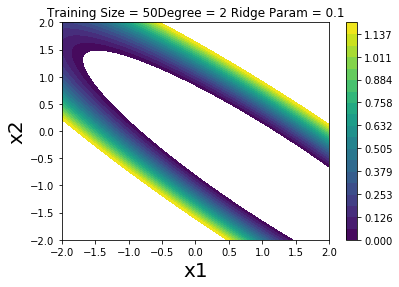

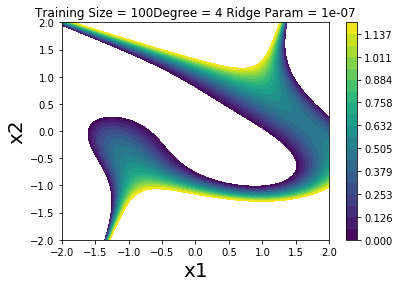

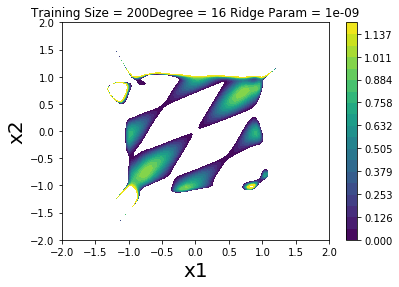

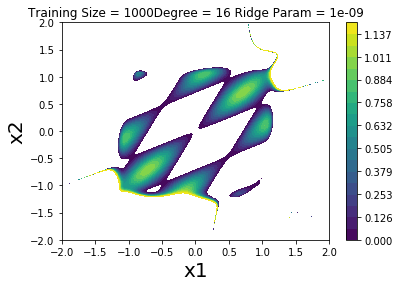

In [48]:
# Cell type : CodeWrite 
import numpy as np
import matplotlib.pyplot as plt

#lambda
lambs=[1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
#degree k 
degrees=[1,2,4,8,16]
#dimesion d=2
d=2
#size of the training data set
sizes=[50,100,200,1000]
#(1+u+v)**k
#we define function as y=w.T*phi(x), W=phi.Tå, å=(K+lI)^(-1)*Y å=alpha
dtfiles=['dataset4_1.npz']
for dtfile in dtfiles:
    dataset=np.load(dtfile)
    X_dt=dataset[dataset.files[0]]
    Y_dt=dataset[dataset.files[1]]
    X_test=dataset[dataset.files[2]]
    Y_test=dataset[dataset.files[3]]

def Phi(x,k):
    #here X is 2D vector (x1,x2)
    d=2
    phi=[]
    #n=np.math.factorial(k+d)//(np.math.factorial(k)*np.math.factorial(d))
    for i in range(k+1):
        for j in range (i+1):
            phi.append((x[0]**j)*(x[1]**(i-j)))
    #dimension of phi is nx1
    #print(phi)
    return np.array(phi)

def Kernel(X,deg):
    #here X is matrix mx2
    P=[]
    for x in X:
        P.append(Phi(x,deg))
    K=np.matmul(P,np.transpose(P))
    return K

def W(l,deg,X_train,Y_train):
    n=len(X_train)
    K=Kernel(X_train,deg)
    # dimension of phi_matrix is nxf, f is no of features, dim(K)=nxn
    B= np.linalg.inv(K+l*(np.identity(n)))
    alpha = np.matmul(B,Y_train)
    #dimension of alpha is px1
    P=[]
    for x in X_train:
        P.append(Phi(x,deg)) 
    wgt=np.matmul(np.transpose(P),alpha)
    #dimesnion of wgt is nx1
    return np.array(wgt)

def Regression(X,wgt,deg):
    #wgt=W(l,deg,X_train,Y_train)
    Y=[]
    for x in X:
        Y.append(np.matmul(np.transpose(wgt),Phi(x,deg)))
    return Y

def Mse(Y_act, Y_pred):
    SE= np.sum(np.square(np.subtract(Y_act,Y_pred)),axis=0)
    return SE/len(Y_act)

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
    x1=X.reshape(10000,1)
    x2=Y.reshape(10000,1)
    X_=np.stack((x1,x2), axis=-1)
    X_=X_.reshape(10000,2)
    
    Z=Regression(X_,wt_vector,degree)
    Z = np.reshape(Z,(-2,100))
    # Get Z using other functions
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),color = 'black')
    plt.title(title)
    plt.xlabel('x1', fontsize=20)
    plt.ylabel('x2', fontsize=20)
    plt.colorbar()

#calculate errors
train_er=[]
test_er=[]
wt_sz=[]
for i in range(len(sizes)):
    X_train=X_dt[:sizes[i]]
    Y_train=Y_dt[:sizes[i]]
    train_er_deg=[]
    test_er_deg=[]
    wt_deg=[]
    for j in range(len(degrees)):
        train_er_l=[]
        test_er_l=[]
        wt_l=[]
        for k in range(len(lambs)):
            wt=W(lambs[k],degrees[j],X_train,Y_train)
            wt_l.append(wt)
            Y_train_reg=Regression(X_train,wt,degrees[j])
            Y_test_reg=Regression(X_test,wt,degrees[j])
            test_er_l.append(Mse(Y_test_reg,Y_test))
            train_er_l.append(Mse(Y_train_reg,Y_train))
        train_er_deg.append(train_er_l)
        test_er_deg.append(test_er_l)
        wt_deg.append(wt_l)
    train_er.append(train_er_deg)
    test_er.append(test_er_deg)
    wt_sz.append(wt_deg)

# print("Error calculation")
# for z in range(len(sizes)):
#     error_mat_sz=[]
#     print("for size-", sizes[z])
#     print("test error :")
#     print(test_er[z])
#     print("train error :")
#     print(train_er[z])
#     print("__________")

best_para=[]
for z in range(len(sizes)):
    best_para_z=[]
    min_ind=np.argmin(test_er[z])
    deg_ind=int(min_ind/len(lambs))
    lamb_ind=min_ind%len(lambs)
    #print(min_ind)
    best_para_z.append(deg_ind)
    best_para_z.append(lamb_ind)
    best_para.append(best_para_z)
#print(best_para)

print("Best Learned Functions:")
for i in range(len(sizes)):
    plt.figure()
    #print("Best learned functions for training size:", sizes[i])
    visualise_polynomial_2d(wt_sz[i][best_para[i][0]][best_para[i][1]], degrees[best_para[i][0]], 'Training Size = ' + str(sizes[i]) + 'Degree = ' +str(degrees[best_para[i][0]]) + ' Ridge Param = ' + str(lambs[best_para[i][1]]))

    
                          


** Cell type : TextWrite **

## Observation:
**With Regularised Ridge Regression we handle to control overfitting and underfitting by varying two parameters: the degree and the regularisation parameter. As the complexity (degree) increases the curve overfits, so choosing high lamda keeps the coefficients small and thereby reducing the overfitting.
It is observed that the best parmeters degree and regularisation parameter depends on the size of the training sample as well.
The best parameter values are tabulated below:**
________________________________________

## Best Parameter:
|Data set size|degree|Regression Parameter|
|-----|-----|-----|
|**50**|2|1e-1|
|**100**|4|1e-7|
|**200**|16|1e-9|
|**1000**|16|1e-9|

__________________________________

## Error calculation:

**train error for size 50:**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.503831240660675528e-01 | 2.503831240657272139e-01 | 2.503831240657402590e-01 | 2.503831241962754528e-01 | 2.503844155180828812e-01 | 2.558978296963568821e-01 |
| 2 | 1.341115981269847546e-01 | 1.341115981213417130e-01 | 1.341115981224281217e-01 | 1.341116089798746747e-01 | 1.342130591829447939e-01 | 1.974826992879742116e-01 |
| 4 | 1.020183145268267338e-01 | 1.020183145266193026e-01 | 1.020183146446373701e-01 | 1.020194560543771778e-01 | 1.041066492124637366e-01 | 1.806379253076329516e-01 |
| 8 | 1.327327385865199492e-04 | 1.991571159123776144e-04 | 1.076578115894079486e-02 | 4.172134455599316172e-02 | 8.199099254870263753e-02 | 1.631997018256798604e-01 |
| 16 | 1.956563348109625148e-08 | 9.367001016036666084e-06 | 1.317693154393535489e-03 | 3.111309253647917203e-02 | 7.002070549491666573e-02 | 1.500128602707264114e-01 |

 _____________________
 
**train error for size 100:**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.580910133450070032e-01 | 2.580910133393137240e-01 | 2.580910133393146677e-01 | 2.580910133498368619e-01 | 2.580911180012408490e-01 | 2.587398750833155292e-01 |
| 2 | 1.309506275102543527e-01 | 1.309506275076463000e-01 | 1.309506275078045068e-01 | 1.309506290910283921e-01 | 1.309660877087940323e-01 | 1.649677607326055229e-01 |
| 4 | 1.130266378462029681e-01 | 1.130266378417929957e-01 | 1.130266378530508098e-01 | 1.130267496367263758e-01 | 1.136514115830372651e-01 | 1.523734887365071622e-01 |
| 8 | 4.158792641914004634e-02 | 4.158793751632482855e-02 | 4.168003942649445986e-02 | 5.800846639789015297e-02 | 9.290160568698463406e-02 | 1.448856959236295150e-01 |
| 16 | 7.734493809325736799e-06 | 4.839668999296482246e-04 | 7.544023924203191803e-03 | 4.172918471042233457e-02 | 8.369694254931270283e-02 | 1.395438378020544268e-01 |

_____________________

**train error for size 200:**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.465350744860757837e-01 | 2.465350744780528125e-01 | 2.465350744780527015e-01 | 2.465350744794022053e-01 | 2.465350879395789285e-01 | 2.466411543405224172e-01 |
| 2 | 1.336653256222312125e-01 | 1.336653256003588197e-01 | 1.336653256003920709e-01 | 1.336653259375661928e-01 | 1.336686600609654774e-01 | 1.475490375987395519e-01 |
| 4 | 1.133381561054569719e-01 | 1.133381560872695343e-01 | 1.133381560903507085e-01 | 1.133381868560195682e-01 | 1.135898929818812964e-01 | 1.444444042959662500e-01 |
| 8 | 6.173732235700899601e-02 | 6.173732238530352939e-02 | 6.173810090970681397e-02 | 6.394973229162607964e-02 | 9.568723069707896212e-02 | 1.411927922429170590e-01 |
| 16 | 2.881703434452964339e-05 | 1.085431723931462285e-03 | 1.132556433521046332e-02 | 4.446326750323784105e-02 | 8.349956671799345365e-02 | 1.337625989052683151e-01 |

_____________________

**train error for size 1000:**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.625351429357752342e-01 | 2.625346452996742408e-01 | 2.625346503047686908e-01 | 2.625346497793933920e-01 | 2.625345976332777997e-01 | 2.625303041565863471e-01 |
| 2 | 1.424295994806969445e-01 | 1.424293154725376209e-01 | 1.424293198760303303e-01 | 1.424294451851404186e-01 | 1.424420744985760434e-01 | 1.445188511412289767e-01 |
| 4 | 1.270797489195506225e-01 | 1.270796281388953120e-01 | 1.270796441958034484e-01 | 1.270812117133292840e-01 | 1.272420949460402462e-01 | 1.409365893522011581e-01 |
| 8 | 8.481283727594821076e-02 | 8.481261751710324204e-02 | 8.480025143729547077e-02 | 8.391323546099706265e-02 | 9.782269201133786396e-02 | 1.349889244235971120e-01 |
| 16 | 1.197678627245852461e-03 | 1.490068776409122098e-03 | 1.095718694142631781e-02 | 4.965812595825925407e-02 | 9.073740480490559424e-02 | 1.278208960496532431e-01 |

_____________________
_____________________

**test error for size 50 :**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 3.012668099547348155e-01 | 3.012668179551014624e-01 | 3.012667744219779675e-01 | 3.012624963820878521e-01 | 3.008382242491887126e-01 | 2.783506938903703154e-01 |
| 2 | 1.578999640153555539e-01 | 1.578999871042693903e-01 | 1.578998517250858324e-01 | 1.578863180466874849e-01 | 1.567352591706025478e-01 | 2.082236412074107146e-01 |
| 4 | 1.573340048060047069e-01 | 1.573339543491912573e-01 | 1.573329503069150204e-01 | 1.572427810217304767e-01 | 1.618263881891883194e-01 | 1.965685954651569811e-01 |
| 8 | 2.376900986538817619e+02 | 1.725018631147559631e+02 | 1.859425393241055957e+01 | 9.902507528650552615e-01 | 1.651557616986412125e-01 | 1.939185875290033445e-01 |
| 16 | 2.505219909564439718e+02 | 2.320248246759144024e+02 | 6.669768434650646327e+01 | 2.337308326063947561e+00 | 2.039614573746695303e-01 | 1.960573216507578431e-01 |

_____________________

**test error for size 100 :**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.731486597388098625e-01 | 2.731486392199067859e-01 | 2.731486311885935048e-01 | 2.731479790202082092e-01 | 2.730830403049820942e-01 | 2.686215397676514072e-01 |
| 2 | 1.532098836341986015e-01 | 1.532099312736657781e-01 | 1.532098996625965159e-01 | 1.532067811877867725e-01 | 1.529157622358393864e-01 | 1.757094770382385540e-01 |
| 4 | 1.427757716410557320e-01 | 1.427757533307596194e-01 | 1.427760701010251654e-01 | 1.428076385194639308e-01 | 1.460204322221550222e-01 | 1.689801923862895849e-01 |
| 8 | 7.129155074862637553e-01 | 7.113196314512924001e-01 | 5.807591356497507906e-01 | 2.036382630181399478e-01 | 1.626275772179942014e-01 | 1.711684367937081896e-01 |
| 16 | 5.408001207203317762e+01 | 1.177042003863452457e+01 | 2.341658885489197317e+01 | 4.178485084001192229e-01 | 1.883591446691383342e-01 | 1.741599689085641112e-01 |

_____________________

**test error for size 200 :**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.676630339903128819e-01 | 2.676630485324315023e-01 | 2.676630485638438195e-01 | 2.676628765829555112e-01 | 2.676457109610823060e-01 | 2.662254689671442187e-01 |
| 2 | 1.457807951016587278e-01 | 1.457806514319959224e-01 | 1.457806477794856559e-01 | 1.457803520762264160e-01 | 1.457544830563874683e-01 | 1.586822288842048845e-01 |
| 4 | 1.311709138949564146e-01 | 1.311709702842982217e-01 | 1.311709005915533133e-01 | 1.311641457382491383e-01 | 1.308305345016768095e-01 | 1.570851154656927318e-01 |
| 8 | 1.373625921510293890e-01 | 1.373591725519593687e-01 | 1.369820494131845090e-01 | 1.181825930044817646e-01 | 1.139653605091011240e-01 | 1.564511774819902223e-01 |
| 16 | 3.715024898196668535e-02 | 8.371021828741320725e-02 | 1.708066577845955281e-01 | 8.690369897748005668e-02 | 1.112140343299670153e-01 | 1.522440126112745151e-01 |

_____________________

**test error for size 1000 :**

| Degree | e-9 | e-7 | e-5 | e-3 | e-1 | e1 |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1 | 2.625351429357752342e-01 | 2.625346452996742408e-01 | 2.625346503047686908e-01 | 2.625346497793933920e-01 | 2.625345976332777997e-01 | 2.625303041565863471e-01 |
| 2 | 1.424295994806969445e-01 | 1.424293154725376209e-01 | 1.424293198760303303e-01 | 1.424294451851404186e-01 | 1.424420744985760434e-01 | 1.445188511412289767e-01 |
| 4 | 1.270797489195506225e-01 | 1.270796281388953120e-01 | 1.270796441958034484e-01 | 1.270812117133292840e-01 | 1.272420949460402462e-01 | 1.409365893522011581e-01 |
| 8 | 8.481283727594821076e-02 | 8.481261751710324204e-02 | 8.480025143729547077e-02 | 8.391323546099706265e-02 | 9.782269201133786396e-02 | 1.349889244235971120e-01 |
| 16 | 1.197678627245852461e-03 | 1.490068776409122098e-03 | 1.095718694142631781e-02 | 4.965812595825925407e-02 | 9.073740480490559424e-02 | 1.278208960496532431e-01 |
